# MNIST in Julia 1.6 and Flux

Simplified version of the [model zoo MNIST example](https://github.com/FluxML/model-zoo/blob/master/vision/mlp_mnist/mlp_mnist.jl). Trains a two layer aNN on MNIST training data.

In [1]:
using Statistics, Flux, Plots
using Flux: onehotbatch, onecold, crossentropy, throttle
using MLDatasets: MNIST
using Base.Iterators: repeated

Get the MNIST data and reshape.

In [2]:
X,y= MNIST.traindata(Float32); # casting as floats
X = Flux.flatten(X); # convert to matrix, keeping size of last dimension
y = onehotbatch( y, 0:9);

Simple two layer model with softmax

In [3]:
m = Chain(
    Dense(28^2, 128, relu),
    Dense(128, 10),
    softmax
)

loss(x,y) = crossentropy(m(x), y);
opt = ADAM();
accuracy(x,y) = mean(onecold(m(x)) .== onecold(y));

Train the model for 200 epochs, showing crossentropy at regular intervals.

In [4]:
dataset = repeated((X,y),200) # repeat the data set n times
evalcb = () -> @show(loss(X,y))

Flux.train!(loss, params(m), dataset, opt, cb=throttle(evalcb, 10));

println( "Overall accuracy: $(accuracy(X,y))" )

loss(X, y) = 2.3155146f0
loss(X, y) = 0.57314324f0
loss(X, y) = 0.35234916f0
loss(X, y) = 0.2909023f0
loss(X, y) = 0.25399786f0
loss(X, y) = 0.22598939f0
loss(X, y) = 0.20307985f0
loss(X, y) = 0.18240932f0
Overall accuracy: 0.9534833333333333


This seems to have learned enough to describe the dataset. Let's look at the prediction of a random instance.

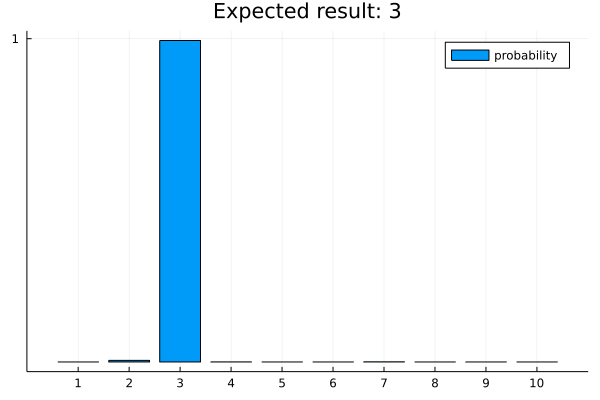

In [5]:
bar( m(X[:,123]), title="Expected result: $(onecold(y[:,123]))", label="probability", ticks=collect(1:1:10) )